In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [3]:
#Tiền xử lý dữ liệu 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Tách dữ liệu thành ảnh và nhãn
X = data.drop('0', axis=1).values
y = data['0'].values


X = X.reshape(-1, 28, 28, 1)

# Chuẩn hóa dữ liệu
X = X / 255.0

# Chuyển đổi nhãn thành one-hot encoding
y = to_categorical(y, num_classes=26)

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Xây dựng mô hình LSTM
model = Sequential([
    Input(shape=(28, 28)),
    LSTM(128, return_sequences=True),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

In [5]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 174s 37ms/step - accuracy: 0.9966 - loss: 0.0097 - val_accuracy: 0.9931 - val_loss: 0.0342
Epoch 2/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 178s 38ms/step - accuracy: 0.9970 - loss: 0.0091 - val_accuracy: 0.9921 - val_loss: 0.0399
Epoch 3/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 173s 37ms/step - accuracy: 0.9971 - loss: 0.0093 - val_accuracy: 0.9928 - val_loss: 0.0353
Epoch 4/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 174s 37ms/step - accuracy: 0.9973 - loss: 0.0085 - val_accuracy: 0.9936 - val_loss: 0.0376
Epoch 5/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 168s 36ms/step - accuracy: 0.9977 - loss: 0.0071 - val_accuracy: 0.9937 - val_loss: 0.0386
Epoch 6/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 168s 36ms/step - accuracy: 0.9976 - loss: 0.0075 - val_accuracy: 0.9939 - val_loss: 0.0391
Epoch 7/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 201s 43ms/step - accuracy: 0.9977 - loss: 0.0077 - val_accuracy: 0.9934 - val_loss: 0.0409
Epoch 8/10
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 255s 55ms/step - accuracy: 

In [8]:
# Lưu mô hình
model.save('/mnt/data/handwritten_character_recognition_lstm.h5')

In [9]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss trên tập kiểm tra: {loss}")
print(f"Độ chính xác trên tập kiểm tra: {accuracy}")

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9944 - loss: 0.0414
Loss trên tập kiểm tra: 0.0400318019092083
Độ chính xác trên tập kiểm tra: 0.9946972727775574


In [10]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step


In [11]:
# Báo cáo đánh giá
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=[chr(i + ord('A')) for i in range(26)]))


Classification Report:

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2806
           B       0.99      0.99      0.99      1673
           C       1.00      1.00      1.00      4742
           D       0.99      0.97      0.98      2044
           E       1.00      0.99      1.00      2214
           F       0.99      0.98      0.99       231
           G       0.99      0.99      0.99      1183
           H       0.99      0.98      0.99      1466
           I       0.98      0.99      0.98       237
           J       0.99      0.99      0.99      1668
           K       0.98      0.99      0.99      1132
           L       0.99      1.00      0.99      2319
           M       0.99      0.99      0.99      2487
           N       0.99      1.00      0.99      3756
           O       1.00      1.00      1.00     11629
           P       1.00      1.00      1.00      3868
           Q       0.99      0.99      0.99      1159
  

In [12]:
# Ma trận nhầm lẫn
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_true, y_pred_classes))


Confusion Matrix:

[[ 2793     0     1     0     0     1     0     1     0     0     2     0
      1     1     0     0     1     2     0     2     1     0     0     0
      0     0]
 [    2  1662     0     0     0     0     1     0     1     0     0     0
      0     0     1     0     0     2     2     0     0     0     0     0
      0     2]
 [    0     1  4723     0     2     0     1     0     2     0     0     8
      0     0     0     1     0     0     2     0     2     0     0     0
      0     0]
 [    0     2     0  1989     0     0     1     0     0     1     0     0
      0     1    40    10     0     0     0     0     0     0     0     0
      0     0]
 [    0     2     4     0  2201     1     2     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0     0     0
      0     2]
 [    0     0     0     0     0   227     1     0     0     0     0     1
      0     0     0     1     0     0     0     1     0     0     0     0
      0     0]
 [

In [13]:
from tensorflow.keras.saving import save_model
save_model(model, 'Lstm_model.keras')

from tensorflow.keras.models import load_model
#Đường dẫn đến file mô hình đã lưu
model_path = 'Lstm_model.keras'
#Load mô hình từ file đã lưu
loaded_model = load_model(model_path)
#In thông tin cấu trúc của mô hình
loaded_model.summary()

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 28, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3584)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         458,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,085,238 (4.14 MB)

 Trainable params: 542,618 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 542,620 (2.07 MB)

In [24]:
#Hàm tiền xử lý ảnh đầu vào
def resize_image(image_path, target_size=(28, 28)):
    image = Image.open(image_path).convert('L')
    ratio = min(target_size[0] / image.width, target_size[1] / image.height)
    new_size = (int(image.width * ratio), int(image.height * ratio))
    resized_image = image.resize(new_size, Image.LANCZOS)
    new_image = Image.new('L', target_size, (255))
    new_image.paste(resized_image, ((target_size[0] - new_size[0]) // 2, (target_size[1] - new_size[1]) // 2))
    return new_image

def preprocess_image(image_path):
    image = resize_image(image_path)
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array.reshape(1, 28, 28, 1)
    return image_array

# Hàm dự đoán ký tự từ ảnh
def predict_character(model, image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_label = np.argmax(predictions, axis=1)
    predicted_character = chr(predicted_label[0] + ord('A'))
    return predicted_character
    
# Đường dẫn đến ảnh
image_path = r'C:\Users\ADMIN\Downloads\A (1)\ok h 2.png'  # Ensure path is correctly formatted
predicted_character = predict_character(model, image_path)
print(f'Predicted character: {predicted_character}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted character: H


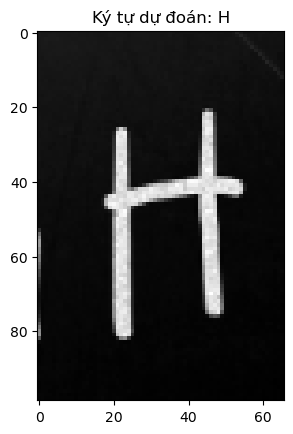

In [25]:
# Hiển thị ảnh và ký tự dự đoán
image = Image.open(image_path).convert('L')
plt.imshow(image, cmap='gray')
plt.title(f'Ký tự dự đoán: {predicted_character}')
plt.show()